# HW04 : Problem 2

Please check last updates and get the latest version from following link. it is more completed but it may have some updates after release it.

[<img src="https://img.icons8.com/clouds/50/000000/github.png"/>](https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/)  
github link : https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/HW04

In [32]:
!wget -q https://github.com/MohammadRaziei/DataSetsArchive/raw/master/NWPU%20VHR-10%20dataset.zip -O 'NWPU VHR-10 dataset.zip'
!unzip -oq "NWPU VHR-10 dataset.zip" 
print('dataset is ready to use :)')

dataset is ready to use :)


In [36]:
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/prepare_data.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/visual_dataset.py

In [ ]:
def visual_dataset():
  pass

In [108]:
ls 

'NWPU VHR-10 dataset'/      prepare_data.py   visual_dataset.py
'NWPU VHR-10 dataset.zip'   sample_data/


In [110]:
import os
import enum
import re
from pprint import pprint

default_root = 'NWPU VHR-10 dataset'

class Point:
    def __init__(self, x,y):
      self.x = x
      self.y = y
    def get(self):
      return (self.x, self.y)
    def __repr__(self):
      return '({},{})'.format(self.x, self.y)

class ObjectType(enum.Enum):
    airplane = 1
    ship = 2
    storageTank = 3
    baseballDiamond = 4
    tennisCourt = 5
    basketballCourt = 6
    groundTrackField = 7
    harbor = 8
    bridge = 9
    vehicle = 10
    
class GroundTruthObject:
    def __init__(self, point_top_left, point_right_bottom, object_type):
      self.top_left = Point(*point_top_left)
      self.right_bottom = Point(*point_right_bottom)
      self.object_type = ObjectType(object_type)
    def __repr__(self):
      return '{%s}'%'{},{}, {}'.format(self.top_left, self.right_bottom, self.object_type.name)

def GroundTruthParser(filename):
    GroundTruthList = []
    with open(filename) as f:
      pattern = re.compile(r'\d+')
      lines = f.readlines() # list containing lines of file
      for line in lines:
        numbers = [int(match.group()) for match in re.finditer(pattern, line)]
        GroundTruthList.append(GroundTruthObject((numbers[0],numbers[1]), (numbers[2],numbers[3]), numbers[4]))
    return GroundTruthList

def getGroundTruthList(number,root=default_root):
    ground_truth_folder = os.path.join(root, 'ground truth')
    filename = os.path.join(ground_truth_folder, '{:03.0f}.txt'.format(number))
    GroundTruthList = GroundTruthParser(filename)  
    return GroundTruthList

GroundTruthList = getGroundTruthList(17)
pprint(GroundTruthList)




[{(52,515),(152,594), airplane},
 {(233,393),(312,452), airplane},
 {(258,472),(333,529), airplane},
 {(272,546),(368,622), airplane},
 {(175,109),(258,187), airplane},
 {(463,9),(543,93), airplane},
 {(521,124),(618,197), airplane},
 {(451,229),(535,311), airplane},
 {(773,352),(856,425), airplane},
 {(891,282),(973,370), airplane},
 {(387,382),(443,429), storageTank},
 {(403,437),(459,478), storageTank},
 {(423,489),(475,527), storageTank},
 {(466,355),(530,403), storageTank},
 {(490,417),(555,467), storageTank},
 {(523,324),(588,374), storageTank},
 {(548,384),(614,437), storageTank},
 {(615,291),(673,332), storageTank},
 {(634,343),(693,383), storageTank},
 {(654,389),(711,435), storageTank}]


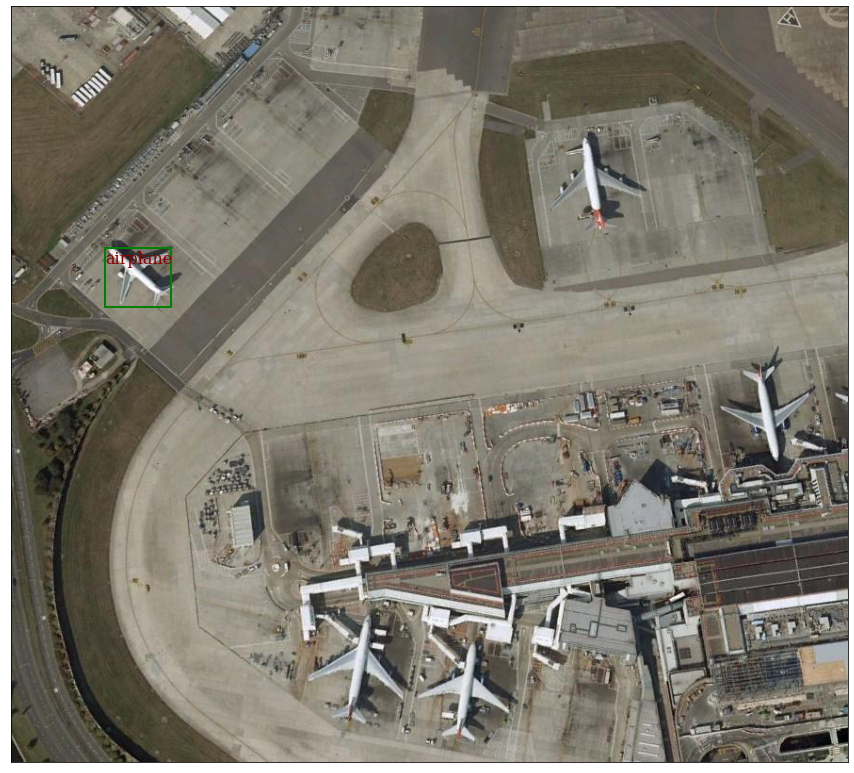

In [137]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


number = 3
positive_folder = os.path.join(default_root, 'positive image set')
filename = os.path.join(positive_folder, '{:03.0f}.jpg'.format(number))
image = plt.imread(filename)

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111)

plt.imshow(image)
plt.grid(False)
plt.xticks([])
plt.yticks([])

def add_groundTruth_patch(groundTruthObject, ax=ax):
  x,y = groundTruthObject.top_left.get()
  x2,y2 = groundTruthObject.right_bottom.get()
  w = x2 - x;  h= y2 - y
  rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='g',facecolor='none')
  ax.add_patch(rect)
  font = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 16}
  ax.text(x,y+16, groundTruthObject.object_type.name, fontdict=font)


add_groundTruth_patch(getGroundTruthList(number)[0],ax)
plt.show()